In [5]:
import cv2
import os
import random
import numpy as np
from PIL import Image  

video_list = []
video_label = []
train_list = []
train_label = []
val_list = []
val_label = []

#generate label list
for root, dirs, files in os.walk('train_writing'):
    for file in files:
        if '.jpg' in file:
            video_list.append(os.path.join(root, file))
            video_label.append(1)
for root, dirs, files in os.walk('training_nowriting'):
    for file in files:
        if '.jpg' in file:
            video_list.append(os.path.join(root, file))
            video_label.append(0)

#random shuffle the video list          
c= list(zip(video_list,video_label))
random.shuffle(c)
video_list,video_label = zip(*c)

#Separate the training set and the validation set
train_list = video_list[:int(len(video_list)*0.8)]
train_label = video_label[:int(len(video_list)*0.8)]
val_list = video_list[int(len(video_list)*0.8):]
val_label = video_label[int(len(video_list)*0.8):]

# im = Image.open(pic_list[1])
# im_data = np.array(im)
# im.show()
# im1 = im.resize((360,360))
# im1.show()
# print(cv2.imread(pic_list[1]).shape)
# print(cv2.imread(pic_list[20]).shape)
# print(cv2.imread(pic_list[50]).shape)
# print(cv2.imread(pic_list[100]).shape)
# print(cv2.imread(pic_list[len(pic_list)-1]).shape)

In [6]:
im = Image.open(video_list[1])
# im_data = np.array(im)
# im.show()
im1 = im.resize((56,56))
im1.show()
# print(cv2.imread(pic_list[1]).shape)
# print(cv2.imread(pic_list[20]).shape)
# print(cv2.imread(pic_list[50]).shape)
# print(cv2.imread(pic_list[100]).shape)
# print(cv2.imread(pic_list[len(pic_list)-1]).shape)

In [7]:
x_train = np.array([np.array(Image.open(im_dir).resize((128,128))) for im_dir in train_list])
y_train = np.array(train_label)
x_val = np.array([np.array(Image.open(im_dir).resize((128,128))) for im_dir in val_list])
y_val = np.array(val_label)

In [8]:
print(len(train_list))
print(len(train_label))
print(len(val_list))
print(len(val_label))
print(len(train_label)/(len(train_label)+len(val_label)))

1315
1315
329
329
0.7998783454987834


In [9]:
im = Image.open(video_list[1])
im1 = im.resize((128,128))
# im.show()
np.array(im1).shape

(128, 128, 3)

In [10]:
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
from keras.models import Sequential
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv2D(32, (5, 5), border_mode='same', input_shape=(128,128,3),data_format="channels_last", activation='relu'))
model.add(Conv2D(32, (5, 5), border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5, 5), border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5, 5), border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (5, 5), border_mode='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
    
model.compile(loss=losses.binary_crossentropy,
            optimizer=optimizers.RMSprop(lr=0.0001),
            metrics=[metrics.binary_accuracy])

filepath="model_{epoch:02d}-{val_loss:.2f}.hdf5"

checkpoint = ModelCheckpoint(filepath, verbose=1, 
                            save_best_only=True)

Using TensorFlow backend.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), input_shape=(128, 128,..., data_format="channels_last", activation="relu", padding="same")`
  app.launch_new_instance()
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", padding="same")`
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="relu", padding="same")`
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="relu", padding="same")`
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (5, 5), activation="relu", p

In [11]:
#Fit the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=256,callbacks=[checkpoint])
# evaluate the model

Train on 1315 samples, validate on 329 samples
Epoch 1/20
1315/1315 [==============================] - 63s 48ms/step - loss: 7.4866 - binary_accuracy: 0.5042 - val_loss: 0.6816 - val_binary_accuracy: 0.5471

Epoch 00001: val_loss improved from inf to 0.68163, saving model to model_01-0.68.hdf5
Epoch 2/20
1315/1315 [==============================] - 70s 53ms/step - loss: 0.7227 - binary_accuracy: 0.5232 - val_loss: 0.6774 - val_binary_accuracy: 0.5593

Epoch 00002: val_loss improved from 0.68163 to 0.67740, saving model to model_02-0.68.hdf5
Epoch 3/20
1315/1315 [==============================] - 65s 49ms/step - loss: 0.6800 - binary_accuracy: 0.5300 - val_loss: 0.6891 - val_binary_accuracy: 0.5106

Epoch 00003: val_loss did not improve from 0.67740
Epoch 4/20
1315/1315 [==============================] - 68s 51ms/step - loss: 0.6827 - binary_accuracy: 0.5437 - val_loss: 0.6770 - val_binary_accuracy: 0.5258

Epoch 00004: val_loss improved from 0.67740 to 0.67695, saving model to model_04

In [12]:
import matplotlib.pyplot as plt
#Visualize the models accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

<Figure size 640x480 with 1 Axes>

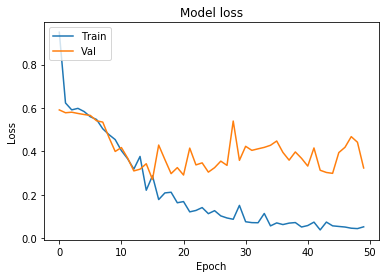

In [11]:
import matplotlib.pyplot as plt
#Visualize the models accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [13]:
test_list = []
test_label = []

#generate label list
for root, dirs, files in os.walk('test_writing'):
    for file in files:
        if '.jpg' in file:
            test_list.append(os.path.join(root, file))
            test_label.append(1)
for root, dirs, files in os.walk('test_nowriting'):
    for file in files:
        if '.jpg' in file:
            test_list.append(os.path.join(root, file))
            test_label.append(0)

#random shuffle the video list          
c= list(zip(test_list,test_label))
random.shuffle(c)
test_list,test_label = zip(*c)

x_test = np.array([np.array(Image.open(im_dir).resize((128,128))) for im_dir in test_list])
y_test = np.array(test_label)

In [14]:
results=model.evaluate(x_test,y_test)

536/536 [==============================] - 6s 11ms/step


In [17]:
results

[0.6781351450663894, 0.5354477763175964]

In [26]:
sample_1=[]
for root, dirs, files in os.walk('sample_frame1'):
    for file in files:
        if '.jpg' in file:
            sample_1.append(os.path.join(root, file))
sample_1_test = np.array([np.array(Image.open(im_dir).resize((128,128))) for im_dir in sample_1])

In [35]:
# for i in range(5):
import matplotlib.pyplot as plt
import jsonlines
prob = model.predict(sample_1_test)
pred = [int(p>0.5) for p in prob]
time = np.arange(15200,16000,5)/10
js = ""
for i, p in enumerate(prob):
    js += "({},{}) ".format(time[i], p)
with jsonlines.open("sample_1_test.jsonl",mode='w') as writer:
    writer.write(js)
plt.plot(time, pred)
plt.xlabel('time (s)')
plt.ylabel('prediction')
plt.savefig("sample_1_test.jpg")
plt.clf()

<Figure size 432x288 with 0 Axes>

In [47]:
sample=[]
j = 5
time = np.arange(11000,12000,5)/10
for root, dirs, files in os.walk("sample_frame{}".format(j)):
    for file in files:
        if '.jpg' in file:
            sample.append(os.path.join(root, file))
sample_test = np.array([np.array(Image.open(im_dir).resize((128,128))) for im_dir in sample])
prob = model.predict(sample_test)
pred = [int(p>0.5) for p in prob]
js = ""
for i, p in enumerate(prob):
    js += "({},{}) ".format(time[i], p)
with jsonlines.open("sample_{}_test.jsonl".format(j),mode='w') as writer:
    writer.write(js)
plt.plot(time, pred)
plt.xlabel('time (s)')
plt.ylabel('prediction')
plt.savefig("sample_{}_test.jpg".format(j))
plt.clf()

<Figure size 432x288 with 0 Axes>

In [48]:
model.load_weights('model_19-0.41.hdf5')

In [ ]:
import matplotlib.pyplot as plt
#Visualize the models accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()